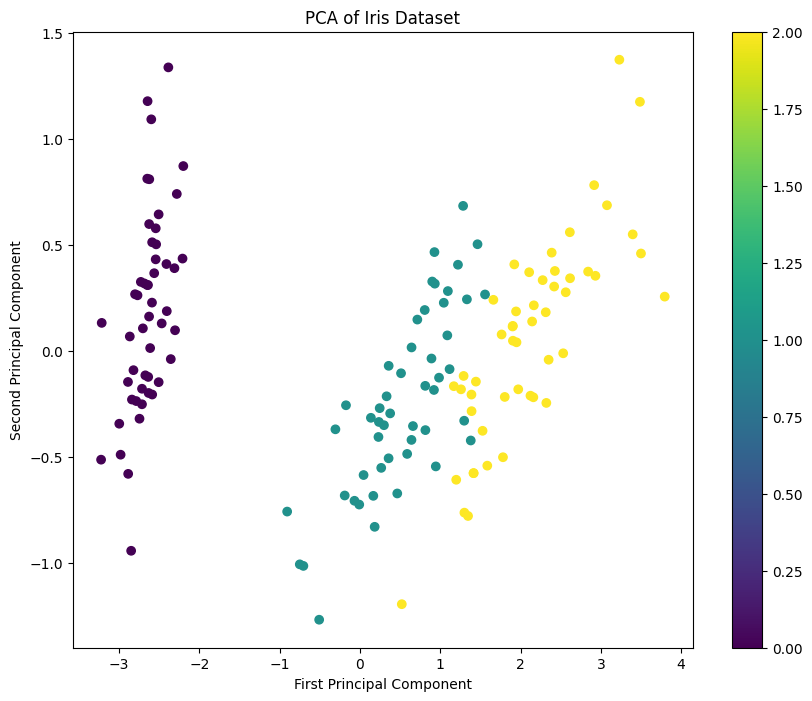

Explained variance ratio: [0.92461872 0.05306648]


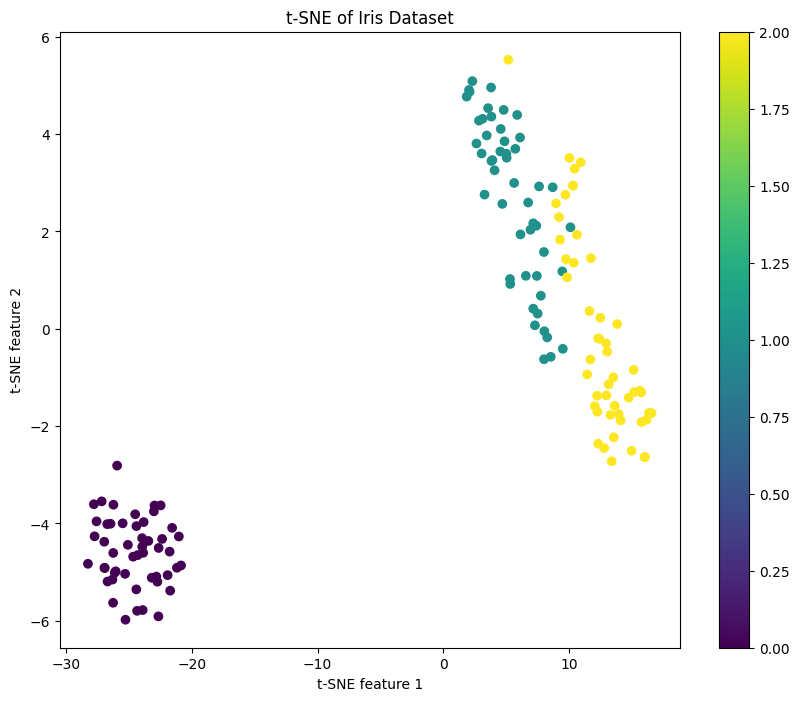

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


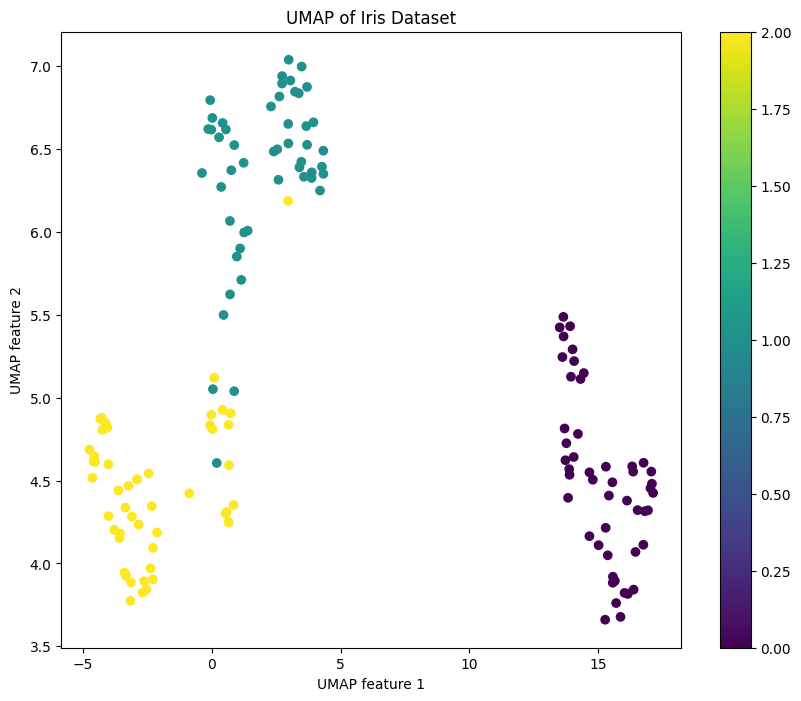

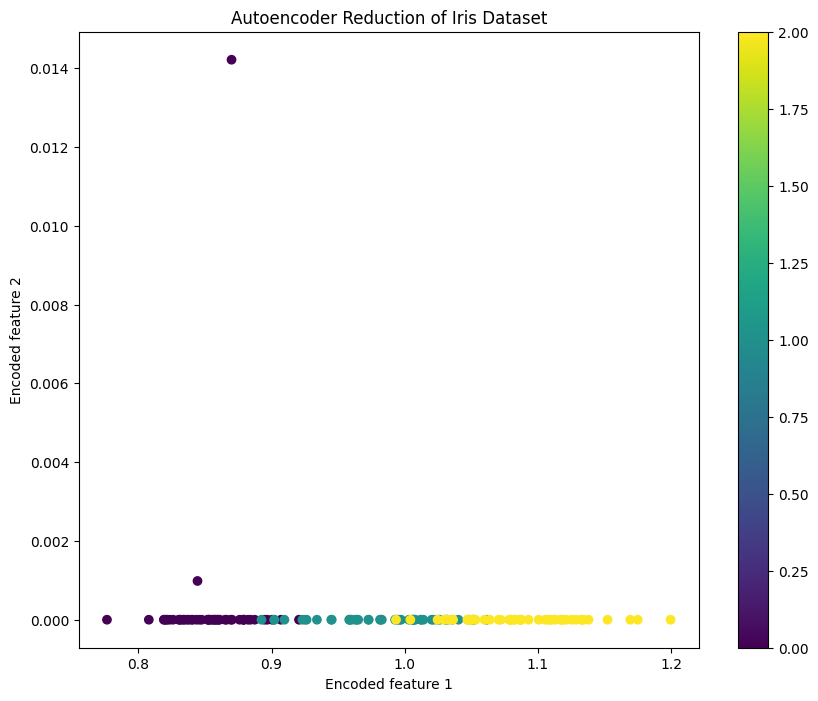

All visualizations have been saved as PNG files.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import torch
import torch.nn as nn
import torch.optim as optim

def save_plot(fig, filename):
    plt.show()
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

def plot_pca():
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    ax.set_title('PCA of Iris Dataset')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    plt.colorbar(scatter)
    save_plot(fig, 'pca_iris.png')
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

def plot_tsne():
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    ax.set_title('t-SNE of Iris Dataset')
    ax.set_xlabel('t-SNE feature 1')
    ax.set_ylabel('t-SNE feature 2')
    plt.colorbar(scatter)
    save_plot(fig, 'tsne_iris.png')

def plot_umap():
    umap_reducer = umap.UMAP(random_state=42)
    X_umap = umap_reducer.fit_transform(X)
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    ax.set_title('UMAP of Iris Dataset')
    ax.set_xlabel('UMAP feature 1')
    ax.set_ylabel('UMAP feature 2')
    plt.colorbar(scatter)
    save_plot(fig, 'umap_iris.png')

def plot_autoencoder():
    # Normalize the data
    X_norm = (X - X.min()) / (X.max() - X.min())
    X_tensor = torch.FloatTensor(X_norm)

    # Define the autoencoder architecture
    class Autoencoder(nn.Module):
        def __init__(self, input_dim, encoding_dim):
            super(Autoencoder, self).__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, encoding_dim),
                nn.ReLU()
            )
            self.decoder = nn.Sequential(
                nn.Linear(encoding_dim, input_dim),
                nn.Sigmoid()
            )
        
        def forward(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    # Set up the autoencoder
    input_dim = X.shape[1]
    encoding_dim = 2
    model = Autoencoder(input_dim, encoding_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())

    # Train the autoencoder
    n_epochs = 50
    batch_size = 16

    for epoch in range(n_epochs):
        for i in range(0, len(X_tensor), batch_size):
            batch = X_tensor[i:i+batch_size]
            optimizer.zero_grad()
            outputs = model(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()

    # Use the encoder part to get the reduced representation
    model.eval()
    with torch.no_grad():
        X_encoded = model.encoder(X_tensor).numpy()

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='viridis')
    ax.set_title('Autoencoder Reduction of Iris Dataset')
    ax.set_xlabel('Encoded feature 1')
    ax.set_ylabel('Encoded feature 2')
    plt.colorbar(scatter)
    save_plot(fig, 'autoencoder_iris.png')

if __name__ == "__main__":
    plot_pca()
    plot_tsne()
    plot_umap()
    plot_autoencoder()
    print("All visualizations have been saved as PNG files.")

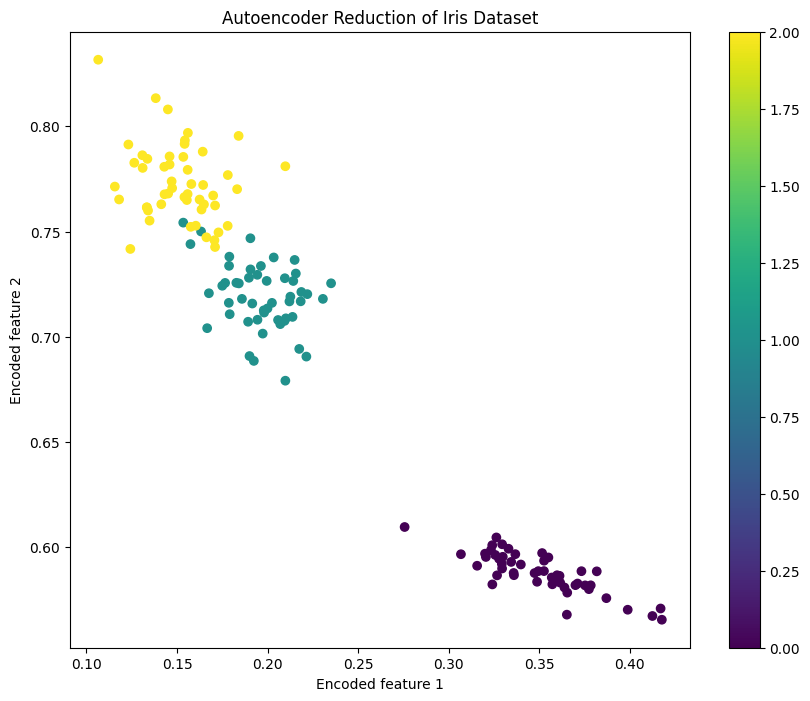

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Normalize the data
X_norm = (X - X.min()) / (X.max() - X.min())
X_tensor = torch.FloatTensor(X_norm)

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Set up the autoencoder
input_dim = X.shape[1]
encoding_dim = 2
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the autoencoder
n_epochs = 50
batch_size = 16

for epoch in range(n_epochs):
    for i in range(0, len(X_tensor), batch_size):
        batch = X_tensor[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

# Use the encoder part to get the reduced representation
model.eval()
with torch.no_grad():
    X_encoded = model.encoder(X_tensor).numpy()

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='viridis')
plt.title('Autoencoder Reduction of Iris Dataset')
plt.xlabel('Encoded feature 1')
plt.ylabel('Encoded feature 2')
plt.colorbar(scatter)
plt.show()
plt.savefig('autoencoder_iris2.png', dpi=300, bbox_inches='tight')
plt.close()